In [ ]:
import math
import numpy as np
import time

## Dupla:
Miguel Prates Ferreira de Lima Cantanhede  
Ada Maris Pereira Mário

## Questão 1
Discuta, detalhadamente, as diferenças entre as funções func1 e func2 apresentadas abaixo. Comente os
códigos, os resultados obtidos e apresente as suas conclusões a partir da aplicação destas duas funções no
exemplo abaixo.

In [ ]:
## A func1 tá tentando dividir uma matriz em matrizes L e U
def func1( A ,verbose=False) :
  n = A.shape[0]    ## N é a quantidade de colunas A (ou o tamanho das linhas)
  U = A.copy()      ## U vira uma cópia de A
  L = np.eye(n)     ## Cria uma matriz identidade de tamanho n
  for j in range ( n - 1 ) : ## Para cada coluna
    for i in range ( j + 1 , n ) : ## Para cada linha (começando) dps da diagonal
      ## Interpretação do loop: a tupla i,j é iterada sobre todos aqueles abaixo da diagonal
      L[i,j] = U[i,j] / U[j,j] ## Pega o iterado i,j na matriz U (que é uma cópia de A anteriormente) e divide pelo valor da diagonal, esse vira o valor de L no iterado i,j
      # print(f"i j: L[{i},{j}] = --> {U[i,j]}/{U[j,j]}",)


      ## Processo similar a fazer:
      ##  - tomando [a,b,c] itens de uma linha "i" de U, que vão do índice j até o final da linha
      ##  - tomando M = L[i,j], um escalar
      ## new [a,b,c]   <---   [a,b,c] - M*[a,b,c] = [a-Ma,b-Mb,c-Mc] = [a,b,c]*(1-M)
      ## ou seja, é como se a sublinha fosse multiplicada por (1-M)
      ## Então o código poderia ser:
      # U[i,j:n] *= (1 - L[i,j])    # otimiza mais por fazer menos acessos a matriz
      U[i,j:n] = U[i,j:n] - L[i,j] * U[j,j:n]
      # print(f"    >> U[{i},{j}:{n}] = {U[i,j:n]}")

  ## Ou seja, acontece um loop que itera as colunas e outro interno que itera sobre as linhas de tal forma que (i,j) é sempre um índice
  ## contido abaixo da diagonal de A. Para cada um desses índices (i,j), pega-se a linha i indo de j até o fim da linha (U[i,j:n]) e
  ## multiplica esse pedaço por (1 - L[i,j]), sendo que L[i,j] é igual a U[i,j] / U[j,j]
  if verbose:
    print("L final: \n",L)
    print("U final: \n",U)
    print("L*U: \n",np.matmul(L,U))
  return (L,U)




def func2(A,p,verbose=False) :
  n = A.shape[0]    ## N é a quantidade de colunas A (ou o tamanho das linhas)
  U = A.copy()      ## U vira uma cópia de A
  L = np.eye(n)     ## Cria uma matriz identidade de tamanho n
  for j in range( n - 1 ) : ## itera sobre colunas (exceto a última)
    v = min(n,j + p + 1)    ## calcula qual será o tamanho da parte da linha (onde ela termina no caso)
    for i in range (j + 1,v) : ## itera sobre as linhas, mas até o v (no func1 era até o n)
      ## A iteração (i,j) é feita de tal forma que (i,j) sempre está abaixo da diagonal
      ## O bloco U[i,j:v] é uma parte da linha i de U que começa em j e tem tamanho p+1 (truncado caso ultrapasse o tamanho máximo da matriz, n)
      # print(f"U[{i},{j}:{v}]: {U[i,j:v]}")
      L[i,j] = U[i,j] / U[j,j] ## É calculado a parcela que vai pra L (idêntico a func1)
      U[i,j:v] = U[ i,j:v] - L [i,j] * U[j,j:v] ## É calculado

  ## Analogamente ao que acontece em func1, ao invés da linha [a,b,c] ir de "j" a "n", agora vai de "j" a "v"
  if verbose:
    print("L final: \n",L)
    print("U final: \n",U)
    print("L*U: \n",np.matmul(L,U))
  return (L, U)




#Parâmetros:
verbose=True
n = 100 ## dimensão da matriz
p = 1 ## tamanho de cada pedaço para se calcular as linhas
A = np.zeros((n,n))

## Modifica a matriz inicial A de uma maneira bem específica
for i in range(n) :
  for j in range (max(0,i - p) , min(n,i + p + 1)):
    A[i,j] = np.random.randint(0,100)/100 #np.random.normal()




print("Função 1: \n\n")
print("A:\n",A,'\n\n')
starttime = time.time()
(L,U) = func1(A,verbose=verbose)
endtime = time.time()

print("Tempo de custo da função 1:",endtime - starttime)
print('\n\n\n','-'*100,'\n\n')



print("Função 2: \n\n")
print("A:\n",A,'\n\n')
starttime = time.time()
(L,U) = func2(A,p,verbose=verbose)
endtime = time.time()
print("Tempo de custo da função 2:",endtime - starttime)

Função 1: 


A:
 [[0.77 0.16 0.   ... 0.   0.   0.  ]
 [0.18 0.61 0.17 ... 0.   0.   0.  ]
 [0.   0.84 0.53 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.88 0.84 0.  ]
 [0.   0.   0.   ... 0.18 0.49 0.89]
 [0.   0.   0.   ... 0.   0.55 0.92]] 


L final: 
 [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.23376623 1.         0.         ... 0.         0.         0.        ]
 [0.         1.46699932 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.23709065 1.         0.        ]
 [0.         0.         0.         ... 0.         1.8910491  1.        ]]
U final: 
 [[ 0.77        0.16        0.         ...  0.          0.
   0.        ]
 [ 0.          0.5725974   0.17       ...  0.          0.
   0.        ]
 [ 0.          0.          0.28061012 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.75920327  0.84
  

Como observado, um método calcula a matriz muito mais rápido que o outro, então vamos fazer uma análise de erro. Fazemos então um gráfico que relaciona o RMSE por p

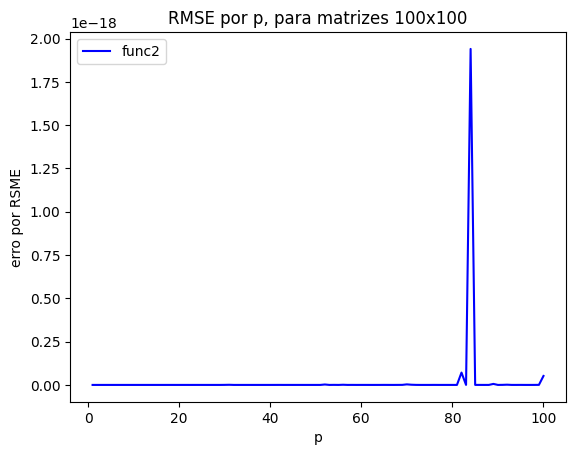

In [ ]:
import matplotlib.pyplot as plt

def RSME(A,B):
  return np.sum((A-B)**2)

n = 100
p_values = np.arange(1,n+1)

historic = []
for p in p_values:
  A = np.zeros((n,n)) ## inicializa A

  ## Modifica a matriz inicial A de uma maneira bem específica
  for i in range(n) :
    for j in range (max(0,i - p) , min(n,i + p + 1)):
      A[i,j] = np.random.normal()

  L,U = func2(A,p)
  newA = np.matmul(L,U)

  erro = RSME(A,newA)
  historic.append(erro)

plt.title(f"RMSE por p, para matrizes {n}x{n}")
plt.ylabel("erro por RSME")
plt.xlabel("p")
plt.plot(p_values,historic,c='blue',label='func2')
plt.legend()
plt.show()


O gráfico mostra erros tão pequenos que chega a ser desprezível (e também é da mesma escala que a func1, pois o p=n, no fim do gráfico, é o equivalente a rodar exatamente a função 1).

Podemos riscar que usar a otimização da func2 causa um erro extra na matriz, e então vamos supor que a modificação inicial feita é o que diferencia se a matriz pode ser rodada usando a func2 ou não.

In [ ]:
## Fazendo uma análise de quais pontos podem ser modificados/assumir qualquer valor (lugares com x)
## Vamos chamar essa matriz de "Matrizes bunitas"
n = 10
p = 2
A = np.full((n,n),' ')
## Modifica a matriz inicial A de uma maneira bem específica
for i in range(n) :
  for j in range (max(0,i - p) , min(n,i + p + 1)):
    A[i,j] = 'x'
print(A)

[['x' 'x' 'x' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['x' 'x' 'x' 'x' ' ' ' ' ' ' ' ' ' ' ' ']
 ['x' 'x' 'x' 'x' 'x' ' ' ' ' ' ' ' ' ' ']
 [' ' 'x' 'x' 'x' 'x' 'x' ' ' ' ' ' ' ' ']
 [' ' ' ' 'x' 'x' 'x' 'x' 'x' ' ' ' ' ' ']
 [' ' ' ' ' ' 'x' 'x' 'x' 'x' 'x' ' ' ' ']
 [' ' ' ' ' ' ' ' 'x' 'x' 'x' 'x' 'x' ' ']
 [' ' ' ' ' ' ' ' ' ' 'x' 'x' 'x' 'x' 'x']
 [' ' ' ' ' ' ' ' ' ' ' ' 'x' 'x' 'x' 'x']
 [' ' ' ' ' ' ' ' ' ' ' ' ' ' 'x' 'x' 'x']]


Vamos supor que para a func2 funcionar, a matriz deva respeitar o formato acima. Para confirmar isso, vamos rodar os dois experimentos: um fazendo a modificação conforme acima e outro fazendo uma modificação na matriz inteira.

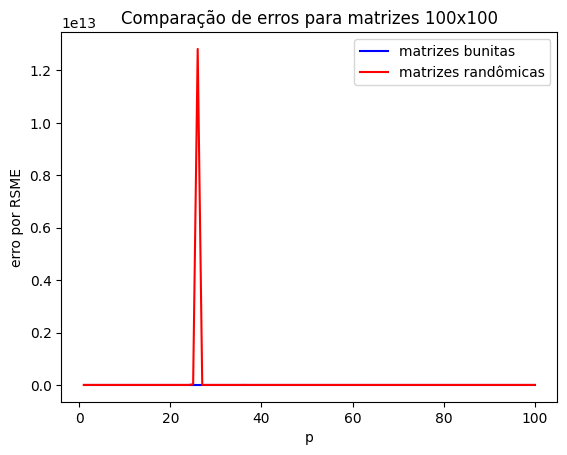

In [ ]:
import matplotlib.pyplot as plt

def RSME(A,B):
  return np.sum((A-B)**2)

n = 100
p_values = np.arange(1,n+1)

historic_Abunitu = []
historic_Anormal = []
for p in p_values:
  ## Fazendo o método da func2 por matrizes bunitas
  A = np.zeros((n,n)) ## inicializa A

  ## Modifica a matriz inicial A de uma maneira bem específica
  for i in range(n) :
    for j in range (max(0,i - p) , min(n,i + p + 1)):
      A[i,j] = np.random.normal()

  L,U = func2(A,p)
  newA = np.matmul(L,U)

  erro = RSME(A,newA)
  historic_Abunitu.append(erro)


  ## Fazendo o cálculo como se A fosse uma matriz completamente randômica
  A = np.random.random((n,n))
  L,U = func2(A,p)
  newA = np.matmul(L,U)
  erro = RSME(A,newA)
  historic_Anormal.append(erro)

plt.title(f"Comparação de erros para matrizes {n}x{n}")
plt.ylabel("erro por RSME")
plt.xlabel("p")
plt.plot(p_values,historic_Abunitu,c='blue',label='matrizes bunitas')
plt.plot(p_values,historic_Anormal,c='red',label='matrizes randômicas')
plt.legend()
plt.show()


Com isso, conclui-se que a func2 não é aplicável para matrizes que não são "bunitas" (é só ver o erro que chegou a 1e9)


Explicação do por que isso ocorre:  

no algoritmo da func1, acontece dentro do loop mais interno:  
$$
U[i , j:n] = \text{multiplicação dele mesmo por um numero real}  
$$
No caso esse número real é calculado como sendo ( 1 - L[i , j] )

Porém, se estamos lidando com matrizes "bunitas", já sabemos que os valores diferentes de 0 na matriz, podem tidos como se fossem "partes linhas de tamanho fixo" (marcadas por x no experimento anterior). Então, o que a func2 faz, é calcular somente o necessário considerando esse espaço, ou seja, ela aproveita saber que o resultado da multiplicação que acontece no ciclo da func1, só é necessário para valores em que A[i , j] é diferente de 0. No experimento acima, burlamos isso ao testar com uma matriz completamente randômica, o que sugere que nesses casos, não há mais garantia que a func2 funcionará.

## Questão 2
Dada a matriz esparsa $A$:

$$
A =
\begin{bmatrix}
4 & -2 & 1 & 0 & 0 & 0 \\
-2 & 7 & -2 & 1 & 0 & 0 \\
1 & -2 & 7 & -2 & 1 & 0 \\
0 & 1 & -2 & 7 & -2 & 1 \\
0 & 0 & 1 & -2 & 7 & -2 \\
0 & 0 & 0 & 1 & -2 & 4 \\
\end{bmatrix}
$$

Considere o sistema $Ax = b$, em que $b = [-1, -2, 1, 1, -2, -1]^T$.

a) Um método iterativo pode ser escrito na forma:

$$ x^{(k+1)} = Cx^{(k)} + g, \quad k \geq 0 $$

Escreva as matrizes de iteração $C_J$ e $C_{GS}$ e os vetores $g_J$ e $g_{GS}$ dos métodos de Gauss-Jacobi e Gauss-Seidel, respectivamente.

b) Verifique se os métodos de Gauss-Jacobi e Gauss-Seidel obtidos no item anterior convergem.

c) Resolva numericamente o sistema $Ax = b$ em questão usando os métodos de Gauss-Jacobi e Gauss-Seidel utilizando erro absoluto inferior a $1 \times 10^{-8}$ e chute inicial $x_0 = (1, 0, 0, 0, 0, 0)$. Discuta os resultados obtidos. Faça um gráfico erro x iterações.


In [ ]:
# Funções para verificação de cada critério de convergência

# Critério das linhas
def rows_criterion(matrix):
  n = matrix.shape[0]
  row_sums = np.sum(np.abs(matrix), axis=1)
  max_row_sum = np.max(row_sums)
  return max_row_sum < 1

# Critério das colunas
def columns_criterion(matrix):
  n = matrix.shape[0]
  transposed_matrix = matrix.T
  return rows_criterion(transposed_matrix)

# Critério de Sassenfeld
def sassenfeld_criterion(matrix):
  n = len(matrix)
  betas = []

  for i in range(n):
      beta_i = np.sum(np.abs(matrix[i, :i])) + np.sum(np.abs(matrix[i, i+1:]))
      betas.append(beta_i)

  beta = max(betas)
  return beta < 1

### Método de Gauss-Jacobi

Para escrever o método de Gauss-Jacobi na forma iterativa $x^{(k+1)} = Cx^{(k)} + g$, utilizaremos a matriz $D$ formada pela diagonal de $A$.

Para Gauss-Jacobi, as matrizes de iteração e vetores de ajuste são:

\begin{equation}
C_{GJ} = I - D^{-1}A
\end{equation}

\begin{equation}
g_{GJ} = D^{-1}b
\end{equation}

In [ ]:
def gauss_jacobi(A, b, x0, tol=1e-8, flag=True, kmax=10000, verbose=False):
  # Obtendo o tamanho da matriz A
  n = np.shape(A)[0]

  # Extraindo a matriz diagonal de A
  D = np.diag(np.diag(A))

  # Resolvendo o sistema D * C = A para obter a matriz C
  aux_C = np.linalg.solve(D, A)

  # Calculando a matriz de iteração C_J
  C = np.eye(n) - aux_C

  # Calculando o vetor g
  g = np.linalg.solve(D, b)

  # Imprimindo as matrizes de iteração e o vetor g
  print("\n\nC_J:", C)
  print("\n\ng_J:", g)

  k = 0
  historic = []

  # Definindo a condição de parada com base no erro ou no número máximo de iterações
  if flag:
      statement = lambda k: (np.linalg.norm(b - A.dot(x0)) > tol and k < kmax)
  else:
      statement = lambda k: (k < kmax)

  # Iniciando o loop das iterações
  while True:
      # Armazenando o histórico do erro
      k += 1
      # Atualizando a aproximação da solução usando a fórmula de iteração do método de Gauss-Jacobi
      x0 = C.dot(x0) + g
      historic.append(np.linalg.norm(b - A.dot(x0)))
      if not statement(k): break

  # Verificando se o número máximo de iterações foi atingido e se o critério de parada baseado no erro está ativado
  if (k >= kmax and flag):
      print("\n Erro: o método não converge. \n")
      return None

  # Imprimindo informações sobre o número de iterações e o erro final, se o modo verbose estiver ativado
  if verbose:
      print(f"\n\nForam necessárias {k} iterações. \nErro final: {historic[-1]}")

  # Verificando a convergência pelo critério das linhas
  is_convergent_rows = rows_criterion(C)

  # Verificando a convergência pelo critério das colunas
  is_convergent_columns = columns_criterion(C)

  print("Convergência pelo critério das linhas:", is_convergent_rows)
  print("Convergência pelo critério das colunas:", is_convergent_columns)

  # Atribuindo o resultado final à variável x
  x = x0
  return x, historic

In [ ]:
A = np.array([[4, -2, 1, 0, 0, 0],
              [-2, 7, -2, 1, 0, 0],
              [1, -2, 7, -2, 1, 0],
              [0, 1, -2, 7, -2, 1],
              [0, 0, 1, -2, 7, -2],
              [0, 0, 0, 1, -2, 4]])

b = np.array([-1, -2, 1, 1, -2, -1])

x0 = np.array([1,0,0,0,0,0])

In [ ]:
x,historic = gauss_jacobi(A,b,x0,flag=True,tol=1e-8,verbose=True)

print("\n\nResposta por Gauss_Jacobi: ",x)



C_J: [[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.28571429  0.          0.28571429 -0.14285714  0.          0.        ]
 [-0.14285714  0.28571429  0.          0.28571429 -0.14285714  0.        ]
 [ 0.         -0.14285714  0.28571429  0.          0.28571429 -0.14285714]
 [ 0.          0.         -0.14285714  0.28571429  0.          0.28571429]
 [ 0.          0.          0.         -0.25        0.5         0.        ]]


g_J: [-0.25       -0.28571429  0.14285714  0.14285714 -0.28571429 -0.25      ]


Foram necessárias 80 iterações. Erro final: 8.306350559188604e-09


Convergência pelo critério das linhas: True

Convergência pelo critério das colunas: True


Resposta por Gauss_Jacobi:  [-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478]


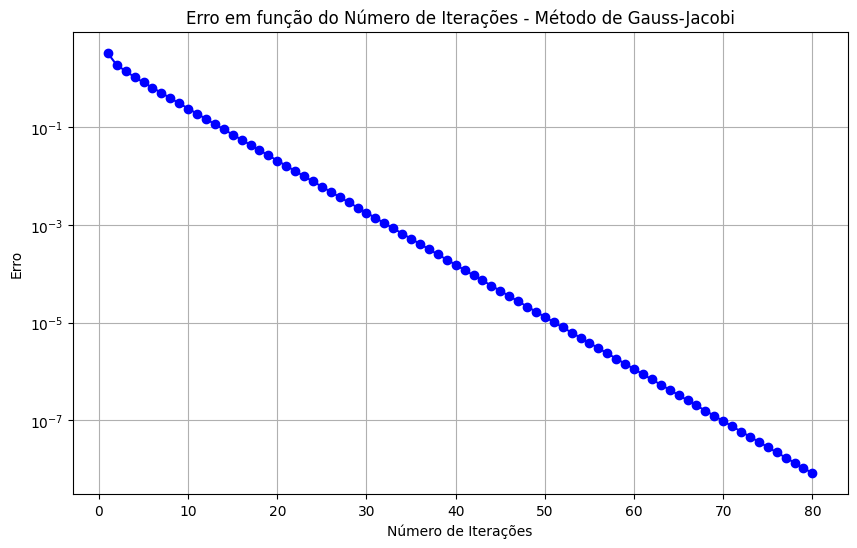

In [ ]:
# Plotando o gráfico Erro x Iterações
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(historic) + 1), historic, marker='o', linestyle='-', color='b')
plt.yscale('log')
plt.xlabel('Número de Iterações')
plt.ylabel('Erro')
plt.title('Erro em função do Número de Iterações - Método de Gauss-Jacobi')
plt.grid(True)
plt.show()

### Método de Gauss-Seidel

Para escrever o método Gauss-Seidel na forma iterativa $x^{(k+1)} = Cx^{(k)} + g$, precisamos decompor a matriz $A$ em $L$ e $R$, em que $L$ é a parte triangular inferior de $A$ e $R$ é a parte triangular superior de $A$ sem a diagonal.

Para Gauss-Seidel, as matrizes de iteração e vetores de ajuste são:
\begin{equation}
C_{GS} = (-L^{-1}R)
\end{equation}

\begin{equation}
g_{GS} = L^{-1}b
\end{equation}

In [ ]:
def gauss_seidel(A, b, x0, tol=1e-8, flag=True, kmax=10000, verbose=False):
    # Decomposição da matriz A em parte triangular inferior L e parte triangular superior R
    L = np.tril(A)
    R = np.triu(A, 1)

    # Cálculo da matriz de iteração C e do vetor g
    C = -np.linalg.solve(L, R)
    g = np.linalg.solve(L, b)

    k = 0

    # Imprimindo as matrizes de iteração e o vetor g
    print("\n\nC_J:", C)
    print("\n\ng_J:", g)

    # Definindo a condição de parada com base no erro ou no número máximo de iterações
    if flag:
        statement = lambda k: (np.linalg.norm(b - A.dot(x0)) > tol and k < kmax)
    else:
        statement = lambda k: (k < kmax)

    historic = []
    while True:
        k += 1
        # Atualizando a aproximação da solução usando a fórmula de iteração do método de Gauss-Seidel
        x0 = C.dot(x0) + g
        historic.append(np.linalg.norm(b - A.dot(x0)))
        if not statement(k): break
    if (k >= kmax and flag):
        print("\n Erro: o método não converge. \n")
        return None

    # Verificando a convergência pelo critério de Sassenfeld
    is_convergent_sassenfeld = sassenfeld_criterion(C)
    print("\nConvergência pelo critério de Sassenfeld:", is_convergent_sassenfeld)

    # Imprimindo informações sobre o número de iterações e o erro final, se o modo verbose estiver ativado
    if verbose:
        print(f"Foram necessárias {k} iterações. \nErro final: {historic[-1]}")

    # Retorna a solução e o histórico de erros
    x = x0
    return x, historic


In [ ]:
x,historic = gauss_seidel(A,b,x0, tol=1e-8,flag=True,verbose=True)

print("\n\nResposta por Gauss_Jacobi: ",x)



C_J: [[-0.          0.5        -0.25       -0.         -0.         -0.        ]
 [-0.          0.14285714  0.21428571 -0.14285714 -0.         -0.        ]
 [-0.         -0.03061224  0.09693878  0.24489796 -0.14285714 -0.        ]
 [-0.         -0.02915452 -0.00291545  0.09037901  0.24489796 -0.14285714]
 [-0.         -0.00395668 -0.01468138 -0.00916285  0.09037901  0.24489796]
 [-0.          0.00531029 -0.00661183 -0.02717618 -0.01603499  0.15816327]]


g_J: [-0.25       -0.35714286  0.07653061  0.21574344 -0.23500625 -0.42143898]

Convergência pelo critério de Sassenfeld: True
Foram necessárias 15 iterações. 
Erro final: 7.401424944651643e-09


Resposta por Gauss_Jacobi:  [-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478]


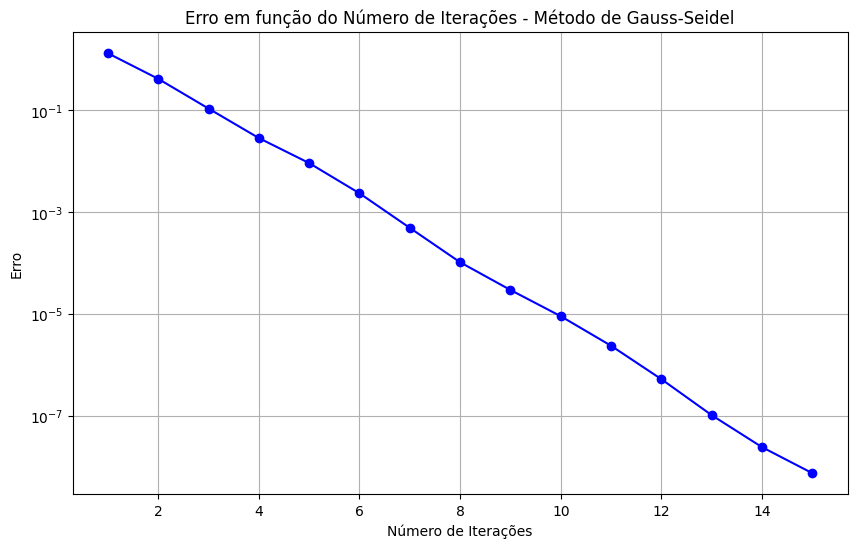

In [ ]:
# Plotando o gráfico Erro x Iterações
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(historic) + 1), historic, marker='o', linestyle='-', color='b')
plt.yscale('log')
plt.xlabel('Número de Iterações')
plt.ylabel('Erro')
plt.title('Erro em função do Número de Iterações - Método de Gauss-Seidel')
plt.grid(True)
plt.show()

Para o método de Gauss-Jacobi, foram necessárias 80 iterações para alcançar um erro final de aproximadamente $8.31 \times 10^{-9}$. Já para Gauss-Seidel, foram necessárias apenas 15 iterações para alcançar um erro final de aproximadamente $7.40 \times 10^{-9}$. Este resultado é esperado teoricamente, uma vez que Gauss-Seidel converge mais rápido que Gauss-Jacobi. Uma diferença importante a ser notada entre os dois método é que Gauss-Seidel reaproveita o cálculo do $x_1^{(k+1)}$ para ser utilizado em $x_2^{(k+1)}$, diferentemente
de Gauss-Jacobi que faz $x_1^{(k+1)}$ e em $x_2^{(k+1)}$ usa o $x_1^{(k)}$.

\
Ambos os métodos convergiram conforme esperado, como confirmado pelos critérios de convergência utilizados (critério de Sassenfeld para Gauss-Seidel e critérios das linhas e colunas para Gauss-Jacobi). Além disso, as soluções obtidas pelos dois métodos são idênticas, o que indica consistência entre os resultados.

## Questão 3
A região sombreada do gráfico apresentado a seguir representa o perfil de duas elevações dadas pela função:

$ p(x) = -x^4 + 7.7x^3 - 18x^2 + 13.6x $

Um projétil é lançado a partir da menor elevação e descreve uma curva dada por:

$ q(x) = -x^2 + 5x + 0.75 $

Pede-se determinar a altura na qual ocorre o impacto com a maior elevação.

Comente as soluções detalhadamente, apresentando os códigos utilizados, os critérios de parada e comparações entre os dois resultados.


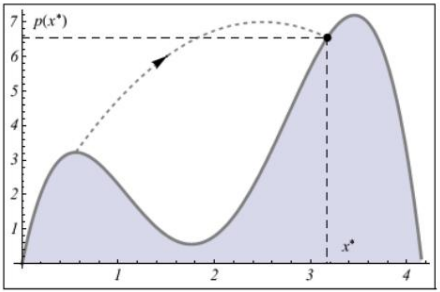

### a) Formule o problema de modo que sua solução seja uma raiz de uma função não linear $ f : \mathbb{R} \rightarrow \mathbb{R} $. Use o método da bissecção com precisão $ 0.001 $ e até $ 5 $ iterações para aproximar esta raiz e, consequentemente, a altura na qual ocorre o impacto.

Suponha $f ∈ C([a, b])$ e $f(a) · f(b) < 0$. O método da bisseção gera uma sequência {$x_0, x_1, \ldots$} que se aproxima de uma raiz $\alpha$ de $f$ com:
\begin{equation}
|x_k - α| ≤ \frac{b - a}{2^k}
\end{equation}

In [ ]:
def bissecao(func, a, b, tol=1e-3, kmax=1000):
    """
    Método da bisseção para encontrar a raiz de uma função no intervalo [a, b].

    Parâmetros:
    func: função que queremos encontrar a raiz.
    a, b: limites do intervalo onde procuramos a raiz.
    tol: tolerância para o erro absoluto da raiz encontrada (padrão é 1e-3).
    kmax: número máximo de iterações permitidas (padrão é 1000).

    Retorna:
    x: a raiz encontrada.
    erro: o erro absoluto na raiz encontrada.
    k: o número total de iterações realizadas.
    """

    # Inicialização dos valores
    x = (a + b) / 2  # Calcula o ponto médio do intervalo [a, b]
    erro = math.inf  # Define o erro inicial como infinito
    k = 0  # Inicializa o contador de iterações

    # Loop principal
    while True:
        # Atualiza os limites do intervalo [a, b]
        if func(a) * func(x) < 0:  # Verifica se há uma mudança de sinal entre a e x
            b = x  # Atualiza b se a raiz está à esquerda de x
        else:
            a = x  # Atualiza a se a raiz está à direita de x

        # Atualiza o valor anterior de x, calcula o novo x e o erro
        x0 = x  # Armazena o valor atual de x
        x = (a + b) / 2  # Calcula o novo ponto médio do intervalo [a, b]
        erro = abs(x - x0)  # Calcula o erro absoluto

        # Verifica as condições de parada
        if erro <= tol:  # Verifica se o erro é menor ou igual à tolerância
            break  # Sai do loop se o erro for aceitável
        if k >= kmax:  # Verifica se o número máximo de iterações foi atingido
            break  # Sai do loop se o limite de iterações foi alcançado

        k += 1  # Incrementa o contador de iterações

    # Retorna os resultados
    return x, erro, k  # Retorna a raiz encontrada, o erro e o número de iterações


Neste problema, determinar a altura na qual ocorre o impacto com a maior elevação significa encontrar o ponto em que $ p(x) = q(x) $. Definiremos, então, a função $ f(x) =  p(x) - q(x) $ e a partir dela faremos as iterações para tentar aproximar para uma raiz de $f(x)$.

In [ ]:
## Definição das funções "p" e "q"
p = lambda x: -1*(x**4) + 7.7*(x**3) - 18*(x**2) + 13.6*x
q = lambda x: -1*(x**2) + 5*x + 0.75

## Apenas analisando a imagem, dá pra segmentar a região de 3 a 4 e perceber
## que o impacto ocorre entre 3.1 e 3.2
f = lambda x: p(x) - q(x)
a = 3.1
b = 3.2
raiz,erro,k = bissecao(f,a,b,tol=1e-3,kmax=5)
print("k necessário: ",k)
print('raiz:',raiz)
print('erro:',erro)

k necessário:  5
raiz: 3.17265625
erro: 0.0007812500000001776


In [ ]:
altura_impacto = p(raiz)
print("Altura (Método da Bisseção):", altura_impacto)

Altura (Método da Bisseção): 6.546101510113125


### b) Formule este problema de modo que sua solução seja uma raiz de uma função não linear $ F : \mathbb{R}^2 \rightarrow \mathbb{R}^2 $. Use o método de Newton para sistemas com precisão $ 0.001 $ para aproximar esta raiz e, consequentemente, a altura na qual ocorre o impacto.

Pra fazer isso, vamos criar uma função $ F : \mathbb{R}^2 \rightarrow \mathbb{R}^2 $, de tal forma que seja garantido que $F(x,y) = (0,0)$ quando é intersectado no ponto. Assim, vamos tratar essa função como sendo $F(x,y)= (y-q(x),y-p(x))$, assim quando o projétil atingir o ponto de impacto $(x,y)$, sabemos que $y = q(x) = p(x)$, logo $F(x,y) = (0,0)$

Fazendo a jacobiana de $F(x,y)$, obtemos:

$$
J(x,y) =
\begin{bmatrix}
2x-5 & 1 \\
4x^3-23.1x^2+36x-13.6 & 1
\end{bmatrix}
$$




In [ ]:
import numpy as np
## Implementação das bagaça de newton para sistemas lineares
## Nesse caso, X é um vetor que no nosso caso: X=(x,y)
## para simplificar, vamos fazer um newton_sis que funcione especificamente para R^2
## (não pq é difícil fazer para R^n, mas para o restante da implementação ficar mais legível)


def newton_sis(F,Jac,X,tol=1e-3,kmax=100):
  X = np.array(X,dtype=np.float64)
  erro = math.inf
  for k in range(kmax):
    ## A outra opção era passar logo a inversa da jacobiana, mas aí teríamos que calcular na mão
    x,y = X
    v = np.linalg.solve(Jac(x,y),F(x,y))
    X -= v
    erro = np.linalg.norm(v)
    if erro < tol:
      break
  return X,erro


In [ ]:
## Fazendo a função F
F = lambda x,y: (y-q(x),y-p(x))

d_f1dx = lambda x,y: 2*x-5
d_f1dy = lambda x,y: 1
d_f2dx = lambda x,y: 4*(x**3) - 23.1*(x**2) + 36*x - 13.6
d_f2dy = lambda x,y: 1


## Fazendo a matriz jacobiana
J = lambda x,y: [[d_f1dx(x,y),d_f1dy(x,y)],
                 [d_f2dx(x,y),d_f2dy(x,y)]]



In [ ]:
P = [3,6] ## Sabemos que (3,6) é um ponto próximo do impacto
X,erro = newton_sis(F,J,P,tol=1e-3)
print("Ponto encontrado: ",X)
print("Erro: ",erro)

Ponto encontrado:  [3.1729163  6.54718366]
Erro:  0.00026817565490980304
